Зчитування даних і иведення перших рядків

In [31]:
import pandas as pd

url = "https://uk.wikipedia.org/wiki/%D0%9D%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%BD%D1%8F_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D0%B8"
df = pd.read_html(url)[12]


df.head()


,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,230.0,206.0,160.0,130,73,126,—,—
1,Вінницька,224.0,192.0,142.0,124,84,112,109,76
2,Волинська,247.0,250.0,179.0,153,112,148,141,101
3,Дніпропетровська,204.0,204.0,151.0,123,71,112,111,71
4,Донецька,271.0,214.0,140.0,109,61,98,82,—


Визначення кількості рядків та стовпців


In [7]:
rows, cols = df.shape
print(f"Кількість рядків: {rows}, Кількість стовпців: {cols}")


Кількість рядків: 28, Кількість стовпців: 9


Заміна значень "—" на NaN


In [8]:
df.replace("—", pd.NA, inplace=True)
df.head()

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,230.0,206.0,160.0,130,73,126,<NA>,<NA>
1,Вінницька,224.0,192.0,142.0,124,84,112,109,76
2,Волинська,247.0,250.0,179.0,153,112,148,141,101
3,Дніпропетровська,204.0,204.0,151.0,123,71,112,111,71
4,Донецька,271.0,214.0,140.0,109,61,98,82,<NA>


Визначення типів стовпців


In [9]:
print(df.dtypes)


Регіон     object
1950      float64
1960      float64
1970      float64
1990        int64
2000        int64
2012        int64
2014       object
2019       object
dtype: object


Заміна типів нечислових колонок на числові


In [10]:
df = df.apply(pd.to_numeric, errors="ignore")
df.head()

C:\Users\Міша\AppData\Local\Temp\ipykernel_37836\4116382786.py:1: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors="ignore")


,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,230.0,206.0,160.0,130,73,126,NaN,NaN
1,Вінницька,224.0,192.0,142.0,124,84,112,109.0,76.0
2,Волинська,247.0,250.0,179.0,153,112,148,141.0,101.0
3,Дніпропетровська,204.0,204.0,151.0,123,71,112,111.0,71.0
4,Донецька,271.0,214.0,140.0,109,61,98,82.0,NaN


Визначення частки пропусків в кожній колонці


In [11]:
missing_percentage = (df.isnull().sum() / len(df)) * 100
print(missing_percentage)


Регіон     0.000000
1950       7.142857
1960       3.571429
1970       3.571429
1990       0.000000
2000       0.000000
2012       0.000000
2014       7.142857
2019      14.285714
dtype: float64


Видалення даних з останнього рядка

In [12]:
df = df.iloc[:-1]
df.head()

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,230.0,206.0,160.0,130,73,126,NaN,NaN
1,Вінницька,224.0,192.0,142.0,124,84,112,109.0,76.0
2,Волинська,247.0,250.0,179.0,153,112,148,141.0,101.0
3,Дніпропетровська,204.0,204.0,151.0,123,71,112,111.0,71.0
4,Донецька,271.0,214.0,140.0,109,61,98,82.0,NaN


Заміна відсутніх даних в стовпцях середніми значеннями цих стовпців (метод fillna)

In [13]:
numeric_cols = df.columns[1:]
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors="coerce")

df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

df["Регіон"] = df["Регіон"].fillna(pd.NA)
df.head()

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,230.0,206.0,160.0,130,73,126,111.44,80.173913
1,Вінницька,224.0,192.0,142.0,124,84,112,109.00,76.000000
2,Волинська,247.0,250.0,179.0,153,112,148,141.00,101.000000
3,Дніпропетровська,204.0,204.0,151.0,123,71,112,111.00,71.000000
4,Донецька,271.0,214.0,140.0,109,61,98,82.00,80.173913


Отримання списку регіонів з вищим рівнем народжуваності у 2019 році


In [14]:
high_birth_rate_regions = df[df["2019"] > df["2019"].mean()]["Регіон"].tolist()
print("Регіони з вищим рівнем народжуваності у 2019 році:", high_birth_rate_regions)


Регіони з вищим рівнем народжуваності у 2019 році: ['Волинська', 'Закарпатська', 'Івано-Франківська', 'Львівська', 'Одеська', 'Рівненська', 'Херсонська', 'Чернівецька', 'Київ']


Регіон з найвищою народжуваністю у 2014 році


In [15]:
highest_birth_rate_2014 = df[df["2014"] == df["2014"].max()]["Регіон"].values[0]
print("Регіон з найвищою народжуваністю у 2014 році:", highest_birth_rate_2014)


Регіон з найвищою народжуваністю у 2014 році: Рівненська


Побудова стовпчикової діаграми народжуваності по регіонах у 2019 році


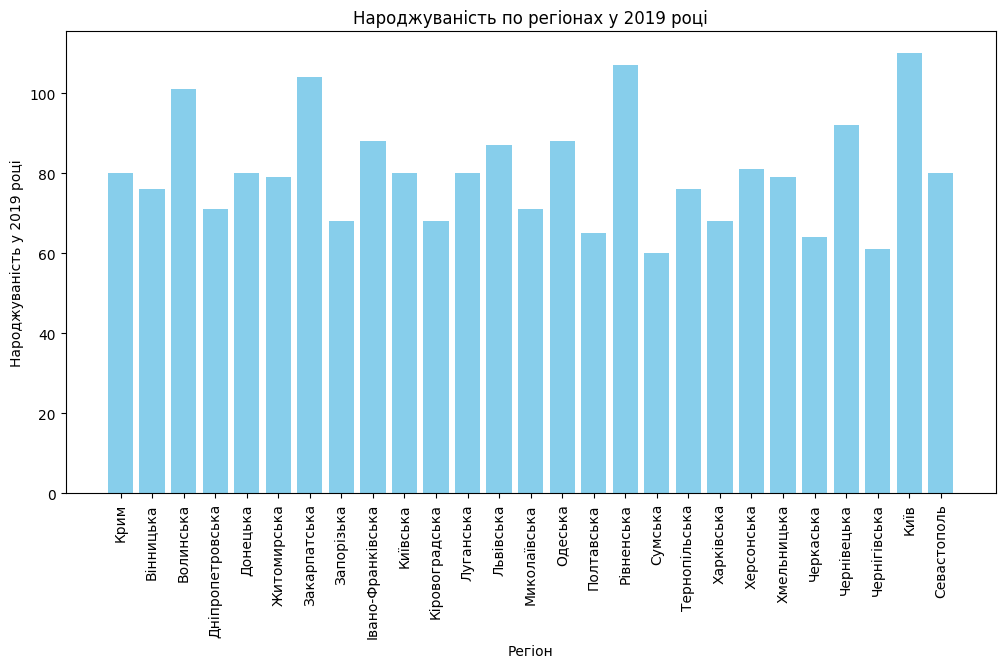

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.bar(df["Регіон"], df["2019"], color="skyblue")
plt.xlabel("Регіон")
plt.ylabel("Народжуваність у 2019 році")
plt.title("Народжуваність по регіонах у 2019 році")
plt.xticks(rotation=90)
plt.show()


Графік розкиду 1960 року і 2019 року

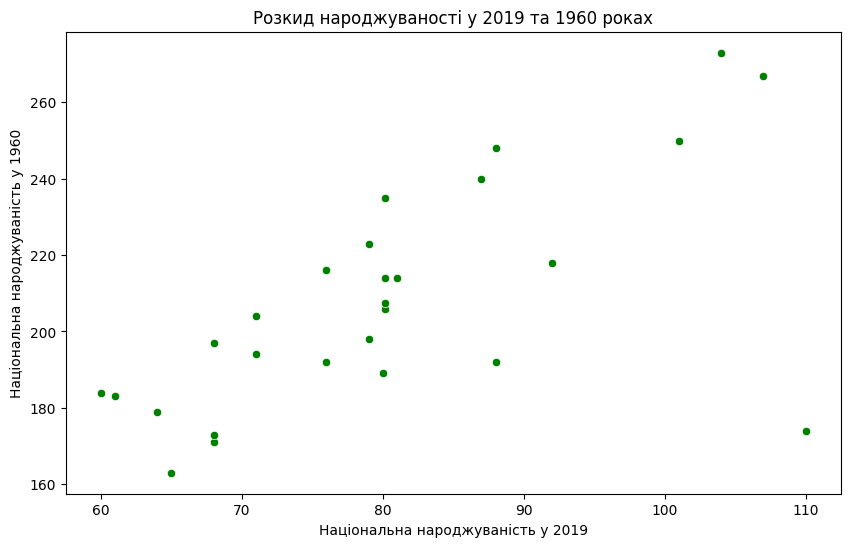

In [17]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x="2019", y="1960", data=df, color='green')
plt.title("Розкид народжуваності у 2019 та 1960 роках")
plt.xlabel("Національна народжуваність у 2019")
plt.ylabel("Національна народжуваність у 1960")
plt.show()


Гістограма рівня народжуваності в регіонах за певний рік (наприклад, 2019 рік)


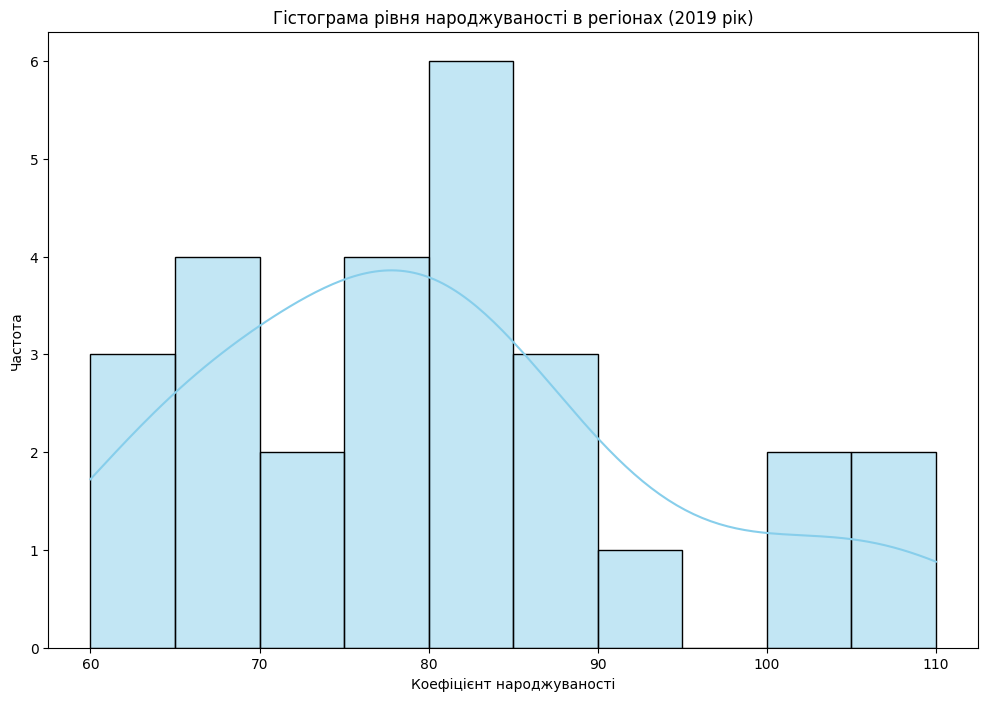

In [18]:
plt.figure(figsize=(12, 8))
sns.histplot(df["2019"].dropna(), bins=10, kde=True, color='skyblue')
plt.title("Гістограма рівня народжуваності в регіонах (2019 рік)")
plt.xlabel("Коефіцієнт народжуваності")
plt.ylabel("Частота")
plt.show()

Графік розсіювання для порівняння рівнів народжуваності в різних роках

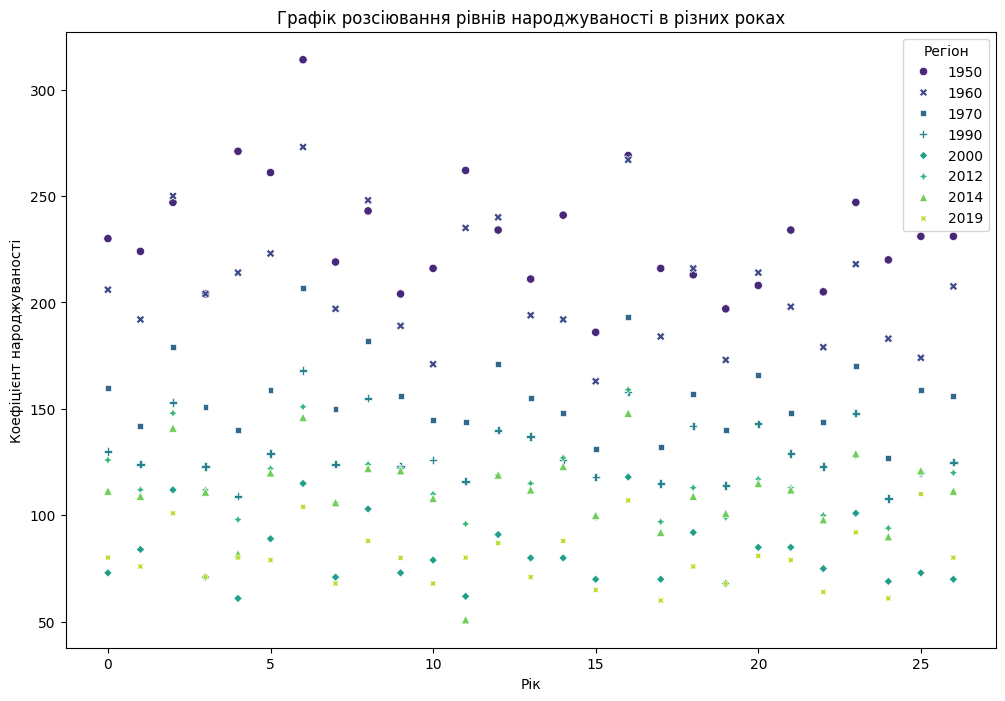

In [19]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df.iloc[:, 1:], marker='o', palette='viridis')
plt.title("Графік розсіювання рівнів народжуваності в різних роках")
plt.xlabel("Рік")
plt.ylabel("Коефіцієнт народжуваності")
plt.legend(title="Регіон", bbox_to_anchor=(1, 1))
plt.show()

Кругова діаграма для відображення частки регіонів з різним рівнем народжуваності у 2019 році

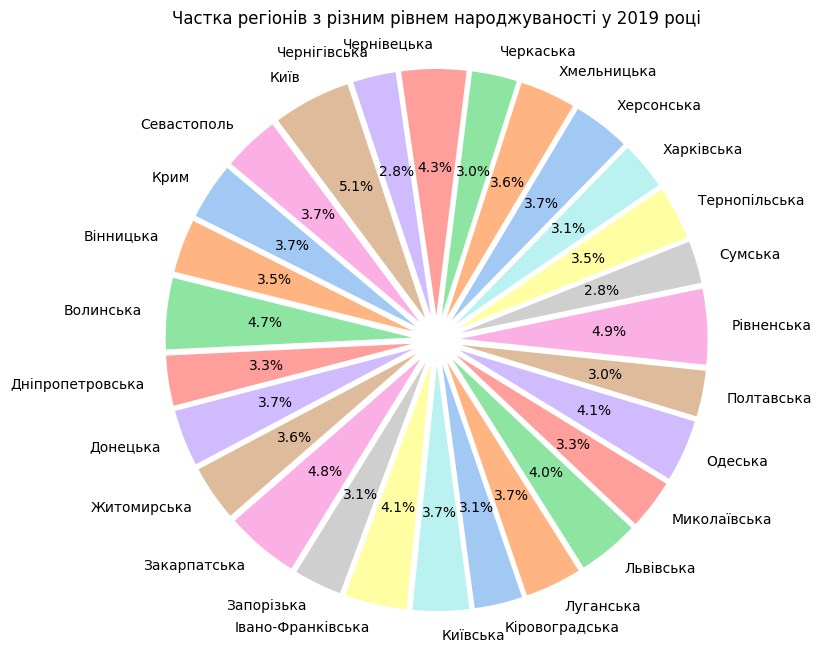

In [29]:
plt.figure(figsize=(12, 8))
explode = (0.1,) * len(df) 
colors = sns.color_palette('pastel')[0:len(df)]

plt.pie(df["2019"], labels=df["Регіон"], autopct='%1.1f%%', startangle=140, colors=colors, explode=explode)
plt.title("Частка регіонів з різним рівнем народжуваності у 2019 році")
plt.show()
